<a href="https://colab.research.google.com/github/shashidharreddydakuri/100DaysOfMLCoding/blob/master/Copy_of_digit_recognition_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install numpy==1.15.0
!pip install pandas==0.22.0
!pip install matplotlib==2.2.2
!pip install scikit-learn==0.15.0
!pip install keras
!pip install tensorflow==1.7.0

     |████████████████████████████████| 13.8MB 8.8MB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


     |████████████████████████████████| 24.3MB 1.2MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.22.0 which is incompatible.
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.1.0 which is incompatible.
ERROR: featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


     |████████████████████████████████| 12.6MB 7.6MB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.1.0 which is incompatible.
  Found existing installation: matplotlib 2.2.4
    Uninstalling matplotlib-2.2.4:
      Successfully uninstalled matplotlib-2.2.4


     |████████████████████████████████| 7.0MB 8.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/36/9f/4e/7152d91d762bc09aca4dfcd382972c63ddb969df73353c0421
Successfully built scikit-learn
ERROR: mlxtend 0.14.0 has requirement scikit-learn>=0.18, but you'll have scikit-learn 0.15.0 which is incompatible.
ERROR: fancyimpute 0.4.3 has requirement scikit-learn>=0.19.1, but you'll have scikit-learn 0.15.0 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.15.0 which is incompatible.
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.15.0 which is incompatible.
ERROR: umap-learn 0.3.8 has requirement scikit-learn>=0.16, but you'll have scikit-learn 0.15.0 which is incompatible.
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
     |████████████████████████████████| 48.0MB 1.5MB/s 
     |█

Epoch 1/5
60000/60000 [==============================] - 42s 705us/step - loss: 1.4093 - acc: 0.7854
Epoch 2/5
60000/60000 [==============================] - 42s 697us/step - loss: 0.1449 - acc: 0.9555
Epoch 3/5
60000/60000 [==============================] - 40s 673us/step - loss: 0.0918 - acc: 0.9717
Epoch 4/5
60000/60000 [==============================] - 42s 698us/step - loss: 0.0639 - acc: 0.9799
Epoch 5/5
60000/60000 [==============================] - 41s 687us/step - loss: 0.0502 - acc: 0.9844


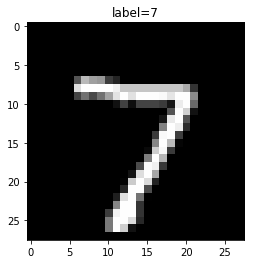

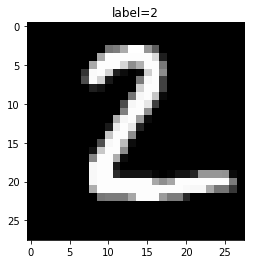

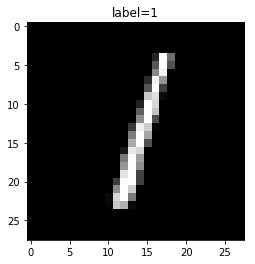

In [0]:
import pandas as pd
import numpy as np
np.random.seed(1337)
from matplotlib import pyplot as plt
from keras.models import Sequential,model_from_json
import keras
from sklearn.cross_validation import train_test_split
from keras.utils import np_utils

def load_split_data(self):
    data = pd.read_csv('digit/train.csv')
    test = pd.read_csv('digit/test.csv')
    data_label = data['label']
    x_train, x_test, x_train_label, x_test_label = train_test_split(data, data_label, test_size=0.20, random_state=42)
    x_train = x_train.drop(columns=['label'])
    x_test = x_test.drop(columns=['label'])
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    return x_test,x_test_label,x_train,x_train_label

def load_from_mnist(self):
    mnist=keras.datasets.mnist
    (x_train, x_train_label),(x_test, x_test_label) = mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    return x_test,x_test_label,x_train,x_train_label


def gen_model(self):
    self.model.add(keras.layers.Conv2D(filters=6, kernel_size=5, strides=(1, 1), padding="same", input_shape=(28, 28, 1),
                                  data_format="channels_last", activation="relu"))
    self.model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    self.model.add(keras.layers.Conv2D(filters=16, kernel_size=5, strides=(1, 1), padding="valid", activation="relu"))
    self.model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    self.model.add(keras.layers.Flatten())
    self.model.add(keras.layers.Dense(120, input_shape=(400,), activation='relu'))
    self.model.add(keras.layers.Dense(84, input_shape=(120,), activation='relu'))
    self.model.add(keras.layers.Dense(units=10, activation='softmax'))

def train_model(self):
    self.model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#    self.model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])load_from_mnist
    self.model.fit(self.x_train, self.x_train_label, epochs=self.no_of_epochs, batch_size=self.batch_size)

def save_model(self):
    model_json = self.model.to_json()
    with open("%s.json" % self.save_model_name, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    self.model.save_weights("%s.h5" % self.save_model_name)

def predict_output(self):
    # loss_and_metrics = model.evaluate(x_test, x_test_label,batch_size=32)
    classes = self.model.predict(self.x_test, batch_size=self.batch_size)
    classes = classes.argmax(axis=1)
    for row in range(0, 3):
        plt.title("label=%s" % classes[row])
        plt.imshow(np.reshape(self.x_test[row], (28, 28)), cmap='gray')
        plt.show()

def encode_data(self):
    self.x_train_label = np_utils.to_categorical(self.x_train_label, self.no_of_classes)
    self.x_test_label = np_utils.to_categorical(self.x_test_label, self.no_of_classes)

def load_model(self):
    print("Loading model from disk")
    # load json and create model
    json_file = open('%s.json' % self.save_model_name, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    self.model = model_from_json(loaded_model_json)
    # load weights into new model
    self.model.load_weights("%s.h5" % self.save_model_name)
    print("Loaded model from disk")

class digit_recognition:
    def __init__(self):
        self.model=Sequential()
#        self.x_test,self.x_test_label,self.x_train,self.x_train_label=self.load_split_data()
        self.x_test, self.x_test_label, self.x_train, self.x_train_label = self.load_from_mnist() #load data from mnist
        self.no_of_epochs=5
        self.batch_size=300
        self.save_model_name='lenet'
        self.no_of_classes=10
    load_split_data=load_split_data
    encode_data=encode_data
    gen_model=gen_model
    train_model=train_model
    predict_output=predict_output
    save_model=save_model
    load_model=load_model
    load_from_mnist=load_from_mnist


def digit_recog_crt():
    digit=digit_recognition()
    digit.encode_data()
    digit.gen_model()
    digit.train_model()
    digit.predict_output()
    digit.save_model()

def digit_recog_reuse():
    digit = digit_recognition()
    digit.encode_data()
    digit.load_model()
    digit.predict_output()

if __name__ == '__main__':
    digit_recog_crt()
#    digit_recog_reuse()
